<h3><center>Universidad Politécnica de Yucatán</center></h3>
<h3><center>Machine Learning</center></h3>
<h3><center>Teacher: Victor Alejandro Ortiz Santiago</center></h3>
<h3><center>Student: Enrique Arturo Emmanuel Chi Gongora</center></h3>



<h1><center>K-Nearest Neighbors</center></h1>

According to IBM website the definition of K Nearest Keighbor algorithm, also known as KNN or k-NN, is  a nonparametric supervised learning classifier, which uses proximity to make classifications or predictions about the clustering of an individual data point. The KNN algorithm is mainly used to classify things into groups.The closest neighbors are observed to decide which group they belong to based on the majority of neighbors, and it does not necessarily have to be an overwhelming majority.

The intuition behind the NN algorithm is easy to understand. If you have a group of points on a graph, and each point has a label that indicates which category it belongs to. For example, each point could represent different types of colors, and the labels could be red and blue.

Now, if you want to classify a new point on the graph and you don't know which category it belongs to. The basic idea behind KNN is that points that are close to each other in the graph tend to be similar in terms of their category.

So, what KNN does is to look at the "k" points closest to the new point you want to classify. For example, if k=5 is chosen, the algorithm will look for the 5 points closest to the new point. It then looks at the labels of these 5 nearest points and makes a decision based on the most labels of those nearest neighbors.

For example, if of the 5 nearest points, 3 are red, and 2 are blue, KNN will classify the new point as red because there is a majority of that color among the nearest neighbors.

<h3>Algorithm pseudocode<h3>

To utilize the KNN algorithm, it's crucial to adhere to the sequence of steps outlined as follows in pseudocode:

1.- Load the Data
* Import the necessary libraries.
* Load the dataset.

2.- Split the Dataset
* Split the dataset into features (x) and target variable (y).
* Split the dataset into training and testing sets for both (x) and (y).

3.- Scale the Features (optional but recommended)
* Create a StandardScaler object to standardize the features.
* Standardize the training features.
* Standardize the testing features.

4.- Create a KNN Classifier and Perform Prediction Tests
* Choose the number of neighbors (k).
* Create a KNN classifier with the chosen number of neighbors and desired metric.
* Train the KNN classifier using the training dataset.
* Make predictions on the testing dataset.

5.- Evaluate the Model
* Calculate the confusion matrix.
* Calculate the classification report.

6.- Obtain Precision and Accuracy
* To obtain the formula of Precision use: 

    (TP + TN) / (TP + TN + FP + FN), 
    
    Where:

     TP = True Positives 
     
     TN = True Negatives
     
     FP = False Positives
     
     FN = False Negatives
      
     
     
* To obtain the formula of Accuracy use:

    (TP) / (TP + FP)
    
    Where:
    
     TP = True Positives 
     
     FP = False Positives
    
    

<h3>Implementation of the algorithm<h3>

In [26]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
#Import dataset
dataset = pd.read_csv('Social_Network_Ads.csv',  sep=",")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


For this activity it was used only the features of 'Age' and 'Estimated Salary' 

In [28]:
# Features for training and testing for (x)
x_train = dataset.iloc[:320 , 2:4] # 80% of the set is separated for train
x_test = dataset.iloc[320: , 2:4] # 20% of the set is separated for test

print("x_train:")
display(x_train)
print("\nx_test:")
display(x_test)

x_train:


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
315,39,75000
316,54,104000
317,35,55000
318,45,32000



x_test:


,Age,EstimatedSalary
320,52,138000
321,53,82000
322,41,52000
323,48,30000
324,48,131000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [29]:
# Features for training and testing for (y)
y_train = dataset.iloc[:320 , 4].values # 80% of the set is separated to train the output
y_test = dataset.iloc[320: , 4].values # 20% of the set is separated for output testing

print("y_train:")
display(y_train)
print("\ny_test:")
display(y_test)

y_train:


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,


y_test:


array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [30]:
#Scaling features
scaler = StandardScaler() # Create a StandardScaler object to standardize features.
x_train = scaler.fit_transform(x_train) # Standardizes training characteristics.
x_test = scaler.transform(x_test) # Standardizes test features.

In [31]:
# Crear un clasificador KNN
k = 5  # Number of neighbors
classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2) # Create a KNN classifier
classifier.fit(x_train, y_train) # Train the KNN classifier with the training data.

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(x_test) # Make predictions on the test set.

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred) # Calculate the confusion matrix.
classification_rep = classification_report(y_test, y_pred) # Calculate the ranking classification.

In [34]:
df_conf_matrix = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

# Print confusion matrix
print("Confusion Matrix:\n")
display(df_conf_matrix)

Confusion Matrix:



,Predicted Positive,Predicted Negative
Actual Positive,29,0
Actual Negative,8,43





This is the structure of the confusion matrix:
    
    

| True Positives (TP) | False Positives (FP) |
|----------------------|-----------------------|
| False Negatives (FN) | True Negatives (TN)  |

* True Positives (TP): Represents the number of cases that the model has correctly classified as positive.
* False Positives (FP): Indicates the number of cases that the model has incorrectly classified as positive when they are actually negative.
* False Negatives (FN): Shows the number of cases that the model has incorrectly classified as negative when they are actually positive.
* True Negatives (TN): Represents the number of cases that the model has correctly classified as negative.

In [35]:
# Precision for the positive class (1)
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Accuracy for all classes
accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / (conf_matrix[0, 0] + conf_matrix[0, 1] + conf_matrix[1, 0] + conf_matrix[1, 1])

print("Precision:", precision)
print("Accuracy:", accuracy)

Precision: 1.0
Accuracy: 0.9


<h3>Loss function and Optimization function identification<h3>
    

K-Nearest Neighbors does not use a specific loss function nor does it require an optimization function during its training. Instead, KNN relies on a near-neighbor strategy to make predictions. 

There is no loss function that is optimized during KNN training, nor is any parameter tuning process performed through an optimization algorithm. The choice of k (the number of neighbors) and the distance metric are hyperparameters that must be selected before applying the algorithm, but are not optimized during training. Instead of a loss function, KNN relies on similarity and near-neighbor voting to make classification decisions.

<h3>References<h3>


* (2020) Comprensión de la Matriz de Confusión y Cómo implementarla en python, DataSource.ai. Available at: https://www.datasource.ai/es/data-science-articles/comprension-de-la-matriz-de-confusion-y-como-implementarla-en-python (Accessed: 07 October 2023). 

* ¿Qué es knn? (no date) IBM. Available at: https://www.ibm.com/mx-es/topics/knn (Accessed: 07 October 2023). 

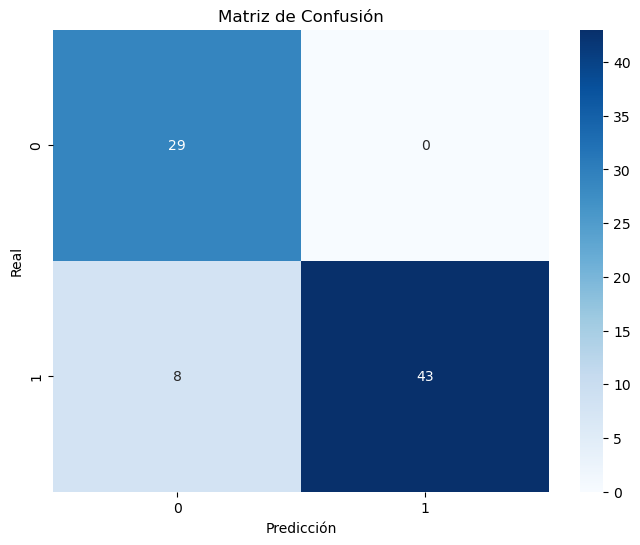

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que conf_matrix es tu matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()